## Observations and Insights 

Dependencies and Setup

In [344]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
from matplotlib import cm
import numpy as np

cmap1 = cm.get_cmap('cividis', 10)
cmap2 = cm.get_cmap('Accent', 7)

Study data files

In [345]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

Read the mouse data and the study results

In [346]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#### Preview  of mouse_metadata

In [347]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


#### Preview of mouse_metadata study_results

In [348]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


#### Combining the data into a single dataset and display the data table for preview

In [349]:
complete_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


#### Checking the number of mice.

In [350]:
num_of_mice = complete_data['Mouse ID'].nunique()
print(f"Total number of mice from the complete data is {num_of_mice}")

Total number of mice from the complete data is 249


#### Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [351]:
dup = study_results[study_results.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
dup_mice_id = dup['Mouse ID'].unique()
print(f'List of duplicated Mice ID number: {dup_mice_id}')

List of duplicated Mice ID number: ['g989']


#### Getting all the data for the duplicate mouse ID. 

In [352]:
p_mice_id_data = complete_data.loc[complete_data['Mouse ID'].isin(dup_mice_id)]
p_mice_id_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


#### Creating a clean DataFrame by dropping the duplicate mouse by its ID.

In [353]:
clean_data = complete_data[~complete_data['Mouse ID'].isin(dup_mice_id)]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


#### Checking the number of mice in the clean DataFrame.

In [354]:
fix_num_of_mice = clean_data['Mouse ID'].nunique()
print(f"Total number of mice from the refined complete data is {fix_num_of_mice}")

Total number of mice from the refined complete data is 248


### Scrubbed Raw Data Summary
* Orignal Mouse ID count: 249
* Number of Duplicate Mouse ID w/ same ID and Timepoint: 1
* Mouse ID Removed: z969
* New original Mouse ID Count: 248

## Summary Statistics

### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the **Tumor Volume** for each regimen

    Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
        * mean
        * median
        * variance
        * standard deviation
        * SEM 
        
Assemble the resulting series into a single summary dataframe.

In [355]:
drug_summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

In [356]:
drug_summary_stats_df = pd.DataFrame({'Mean Tumor Volume': drug_summary_stats.mean(),
                                      'Median Tumor Volume': drug_summary_stats.median(),
                                      'Tumor Volume Variance': drug_summary_stats.var(),
                                      'Tumor Volume STD': drug_summary_stats.std(),
                                      'Tumor Volume SEM': drug_summary_stats.sem()})
drug_summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


#### Using the aggregation method, produce the same summary statistics in a single line

In [357]:
pd.DataFrame(drug_summary_stats.agg(['mean', 'median', 'var', 'std', 'sem']))

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

### Drug Measurement Plot Bar

In [358]:
drug_data = clean_data.groupby('Drug Regimen')
drug_count = drug_data['Mouse ID'].count()
print(drug_count)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


#### Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas 🐼

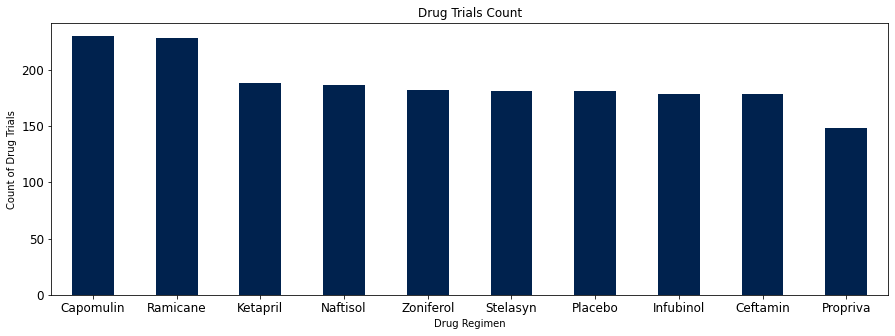

In [359]:
drug_count.sort_values(ascending=False).plot.bar(figsize=(15,5), cmap='cividis', title=('Drug Trials Count'),
                                                 fontsize=12, rot=0, ylabel='Count of Drug Trials')
plt.show()

#### Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot. 📊

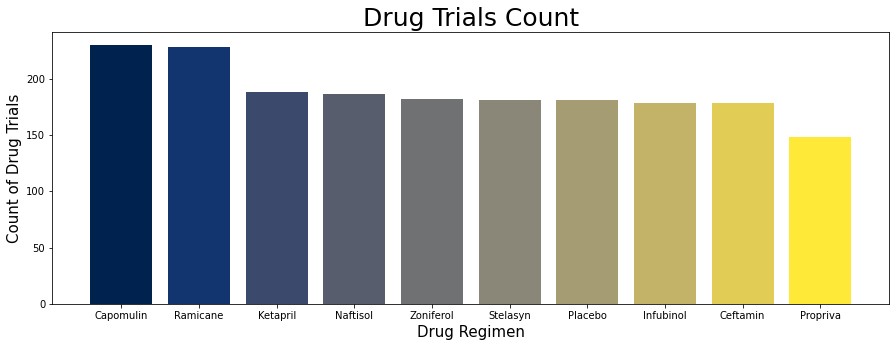

In [360]:
drug_count = drug_count.sort_values(ascending=False)
plt.figure(figsize=(15,5))
plt.bar(drug_count.axes[0], drug_count.values, color=cmap1.colors[0:10])
plt.title('Drug Trials Count', size=25)
plt.xlabel('Drug Regimen', size=15)
plt.ylabel('Count of Drug Trials', size=15)
plt.show()

### Gender Plot Pie

In [361]:
gender = clean_data.groupby('Sex')
gender_type = gender['Mouse ID'].nunique()
gender_type

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

#### Generate a pie plot showing the distribution of female versus male mice using pandas 🐼

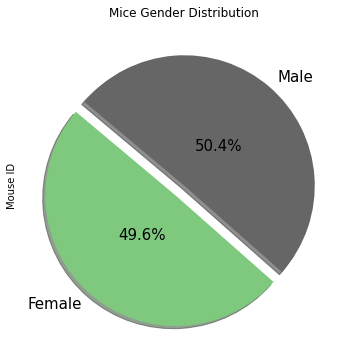

In [362]:
gender_type.plot.pie(figsize=(6,6), cmap='Accent', title='Mice Gender Distribution', explode=(0.1,0),
                     autopct="%1.1f%%", shadow=True, startangle=140, fontsize=15, pctdistance=0.4)
plt.show()

#### Generate a pie plot showing the distribution of female versus male mice using pyplot  📊

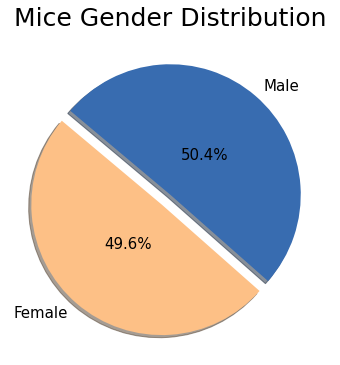

In [363]:
labels = gender_type.axes[0]
sizes = gender_type.values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, explode=(0.1,0), startangle=140, shadow=True, autopct='%1.1f%%',
        colors=cmap2.colors[2:5], textprops={'fontsize': 15}, pctdistance=0.4)
plt.title('Mice Gender Distribution', size=25)
plt.show()


## Quartiles, Outliers and Boxplots

### Calculate the final tumor volume of each mouse across four of the treatment regimens:  
* Capomulin
* Ramicane
* Infubinol
* Ceftamin

#### Start by getting the last (greatest) timepoint for each mouse

In [364]:
timepoint_data = clean_data.groupby('Mouse ID')['Timepoint'].max()
timepoint_df = pd.DataFrame(timepoint_data)
timepoint_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


#### Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [365]:
last_timepoint_df = pd.merge(timepoint_df, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
last_timepoint_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


#### Put treatments into a list for for loop (and later for plot labels)  

In [366]:
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#### Create empty list to fill with tumor vol data (for plotting)


In [367]:
Tumor_Volume = []

#### Calculate the IQR and quantitatively determine if there are any potential outliers. 
    * Locate the rows which contain mice on each drug and get the tumor volumes
    * add subset
    * Determine outliers using upper and lower bounds

In [368]:
Tumor_Volume = []
for drug in Treatments:
    final_tumor_vol = last_timepoint_df.loc[last_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    Tumor_Volume.append(final_tumor_vol)
    
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'{drug} = {outliers}')

Capomulin = Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane = Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol = 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin = Series([], Name: Tumor Volume (mm3), dtype: float64)


#### Last-Timepoint dataframe filtered by 4 key Treatment

In [369]:
drug_series = last_timepoint_df['Drug Regimen'].isin(Treatments)
filtered_df = pd.DataFrame(last_timepoint_df[drug_series])
filtered_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


### Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

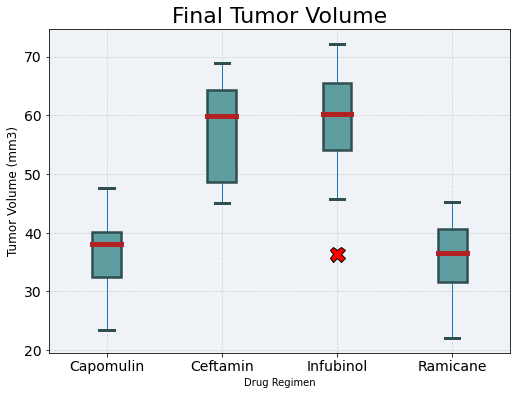

In [370]:
flierprops = dict(marker='X', markerfacecolor='red', markersize=15)
boxprops = dict(linewidth=2.5, color='darkslategrey', facecolor='cadetblue')
medianprops = dict(color='firebrick', linewidth=5, linestyle='-')
capprops = dict(color='darkslategrey', linewidth=3)

ax = filtered_df.boxplot(by='Drug Regimen', column=['Tumor Volume (mm3)'], figsize=(8,6), fontsize=14,
                    flierprops=flierprops, boxprops=boxprops, medianprops=medianprops, widths=.25,
                    capprops=capprops, patch_artist=True)

ax.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.2)

plt.grid(color='lightgrey', linestyle='--')
plt.ylabel('Tumor Volume (mm3)', fontsize=12) 
plt.title("Final Tumor Volume", fontsize=22)
plt.suptitle("")
plt.show()

## Line and Scatter Plots

Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [371]:
Capomulin_df = last_timepoint_df.loc[last_timepoint_df['Drug Regimen'] == 'Capomulin']
Capomulin_df 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


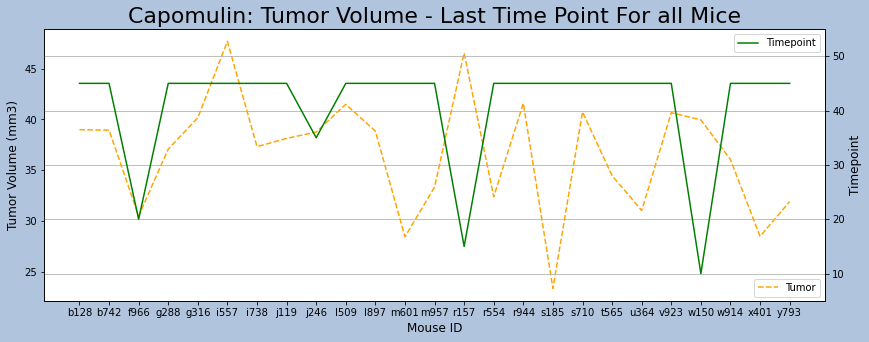

In [372]:
fig, ax_tumor = plt.subplots(figsize=(14,5), facecolor='lightsteelblue')
ax_timepoint = ax_tumor.twinx()


ax_timepoint.plot(Capomulin_df["Mouse ID"], Capomulin_df["Timepoint"], label="Timepoint",  color='green')
ax_tumor.plot(Capomulin_df["Mouse ID"], Capomulin_df["Tumor Volume (mm3)"], label="Tumor", linestyle='--', color='orange')

ax_tumor.set_ylabel('Tumor Volume (mm3)', fontsize=12)
ax_timepoint.set_ylabel('Timepoint', fontsize=12) 
ax_tumor.set_xlabel('Mouse ID', fontsize=12)
plt.ylim(5,55)


ax_timepoint.legend()
ax_tumor.legend(loc='best', bbox_to_anchor=(0.5,0, 0.5, 0.1))
plt.title("Capomulin: Tumor Volume - Last Time Point For all Mice", fontsize=22)
plt.grid()
plt.show()

### l509 Tumor Volume Data

In [373]:
t565_df = clean_data.loc[clean_data['Mouse ID'] == 't565'].set_index('Timepoint')
t565_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,,,,
0,t565,Capomulin,Female,20,17,45.000000,0
5,t565,Capomulin,Female,20,17,45.895647,0
10,t565,Capomulin,Female,20,17,46.749006,0
15,t565,Capomulin,Female,20,17,44.440949,0
20,t565,Capomulin,Female,20,17,39.070214,0
25,t565,Capomulin,Female,20,17,37.342210,0
30,t565,Capomulin,Female,20,17,32.868916,0
35,t565,Capomulin,Female,20,17,33.515671,0
40,t565,Capomulin,Female,20,17,33.949341,0


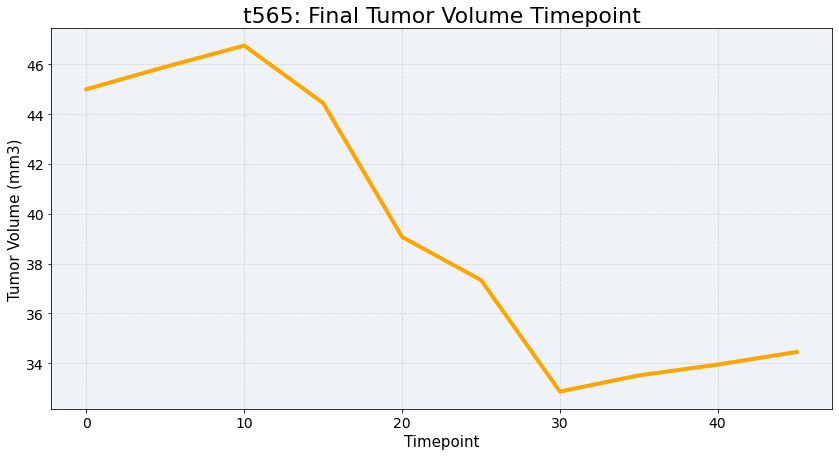

In [374]:
ax = t565_df['Tumor Volume (mm3)'].plot.line(figsize=(14,7), linewidth=4, dash_capstyle='butt', marker='',
                                        color='orange', fontsize=14)

ax.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.2)
plt.title("t565: Final Tumor Volume Timepoint", fontsize=22)
plt.ylabel('Tumor Volume (mm3)', fontsize=15)
plt.xlabel('Timepoint', fontsize=15)
plt.grid(color='lightgrey', linestyle='--')
plt.show()

### Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

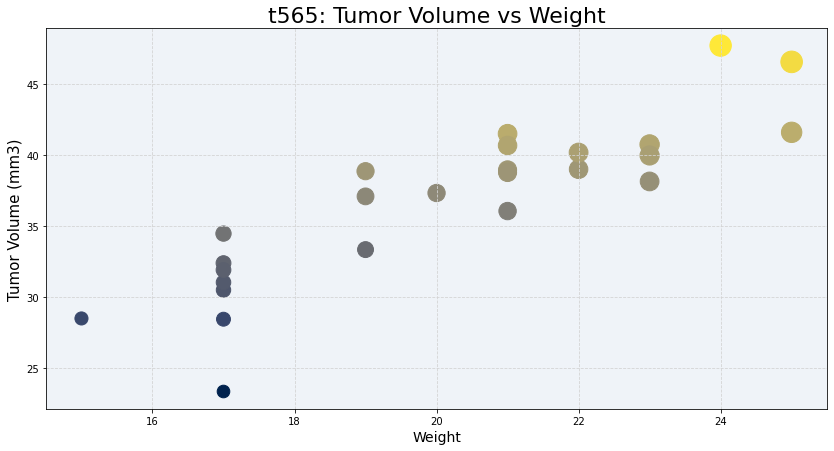

The correlation between both factors is 0.88


In [396]:
Weight = Capomulin_df['Weight (g)']
Tumor = Capomulin_df['Tumor Volume (mm3)']


fig = plt.figure(figsize=(14,7))
ax = plt.axes()

plt.title("t565: Tumor Volume vs Weight", fontsize=22)
plt.ylabel('Tumor Volume (mm3)', fontsize=15)
plt.xlabel('Weight', fontsize=14) 
plt.grid(color='lightgrey', linestyle='--')

ax.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.2)


plt.scatter(Weight,Tumor, c=Tumor, s=0.4*(Tumor)*(Weight), cmap="cividis")
plt.show()
correlation = st.pearsonr(Weight,Tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

## Correlation and Regression

#### Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

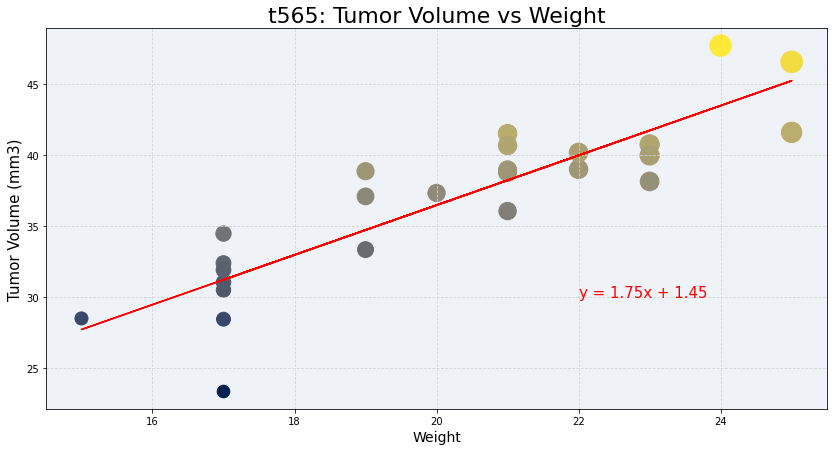

The correlation between both factors is 0.88


In [400]:
fig = plt.figure(figsize=(14,7))
ax = plt.axes()

(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight, Tumor)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.title("t565: Tumor Volume vs Weight", fontsize=22)
plt.ylabel('Tumor Volume (mm3)', fontsize=15)
plt.xlabel('Weight', fontsize=14) 
plt.grid(color='lightgrey', linestyle='--')

ax.set_facecolor('lightsteelblue')
ax.patch.set_alpha(0.2)


plt.scatter(Weight,Tumor, c=Tumor, s=0.4*(Tumor)*(Weight), cmap="cividis")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,30),fontsize=15,color="red")

plt.show()
correlation = st.pearsonr(Weight,Tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")